Nama : Ilham Septa Nugraha<br>
NIM : 211351064<br>
Kelas : IF Pagi B

# Import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ilhamseptanugraha","key":"46ca8b2c9ed34379a8a5b96a89029cb3"}'}

In [2]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d akashdeepkuila/bakery

  0% 0.00/116k [00:00<?, ?B/s]
100% 116k/116k [00:00<00:00, 83.1MB/s]


In [4]:
!mkdir bakery
!unzip bakery.zip -d bakery
!ls bakery

Archive:  bakery.zip
  inflating: bakery/Bakery.csv       
Bakery.csv


# Import Library

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori
import networkx as nx
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

# Data Discovery

In [6]:
df = pd.read_csv('bakery/Bakery.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [8]:
df.head

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<bound method NDFrame.head of        TransactionNo          Items             DateTime    Daypart  DayType
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
2                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
3                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend
4                  3            Jam  2016-10-30 10:07:57    Morning  Weekend
...              ...            ...                  ...        ...      ...
20502           9682         Coffee  2017-09-04 14:32:58  Afternoon  Weekend
20503           9682            Tea  2017-09-04 14:32:58  Afternoon  Weekend
20504           9683         Coffee  2017-09-04 14:57:06  Afternoon  Weekend
20505           9683         Pastry  2017-09-04 14:57:06  Afternoon  Weekend
20506           9684      Smoothies  2017-09-04 15:04:24  Afternoon  Weekend

[20507 rows x 5 columns]>

In [10]:
df.info

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<bound method DataFrame.info of        TransactionNo          Items             DateTime    Daypart  DayType
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
2                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
3                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend
4                  3            Jam  2016-10-30 10:07:57    Morning  Weekend
...              ...            ...                  ...        ...      ...
20502           9682         Coffee  2017-09-04 14:32:58  Afternoon  Weekend
20503           9682            Tea  2017-09-04 14:32:58  Afternoon  Weekend
20504           9683         Coffee  2017-09-04 14:57:06  Afternoon  Weekend
20505           9683         Pastry  2017-09-04 14:57:06  Afternoon  Weekend
20506           9684      Smoothies  2017-09-04 15:04:24  Afternoon  Weekend

[20507 rows x 5 columns]>

In [11]:
df.describe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<bound method NDFrame.describe of        TransactionNo          Items             DateTime    Daypart  DayType
0                  1          Bread  2016-10-30 09:58:11    Morning  Weekend
1                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
2                  2   Scandinavian  2016-10-30 10:05:34    Morning  Weekend
3                  3  Hot chocolate  2016-10-30 10:07:57    Morning  Weekend
4                  3            Jam  2016-10-30 10:07:57    Morning  Weekend
...              ...            ...                  ...        ...      ...
20502           9682         Coffee  2017-09-04 14:32:58  Afternoon  Weekend
20503           9682            Tea  2017-09-04 14:32:58  Afternoon  Weekend
20504           9683         Coffee  2017-09-04 14:57:06  Afternoon  Weekend
20505           9683         Pastry  2017-09-04 14:57:06  Afternoon  Weekend
20506           9684      Smoothies  2017-09-04 15:04:24  Afternoon  Weekend

[20507 rows x 5 columns]>

In [12]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

# Data Preprocessing

In [18]:
df.rename(columns={"DataTime":"Date Time","Daypart":"Day Part","DayType":"Day Type"},inplace=True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,TransactionNo,Items,DateTime,Day Part,Day Type
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [19]:
df["Year"]=pd.to_datetime(df["DateTime"]).dt.year
df["Month"]=pd.to_datetime(df["DateTime"]).dt.month
df["Week Day"]=pd.to_datetime(df["DateTime"]).dt.weekday
df["Hour"]=pd.to_datetime(df["DateTime"]).dt.hour

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
### Replacing the names of the "Months"
df["Month"]=df["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February' ,'March' ,'April' ,'May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))
#### Replacing the names of the "Week Day"
df["Week Day"]=df["Week Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))
### Changing hours
df["Hour"]=df["Hour"].replace((1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



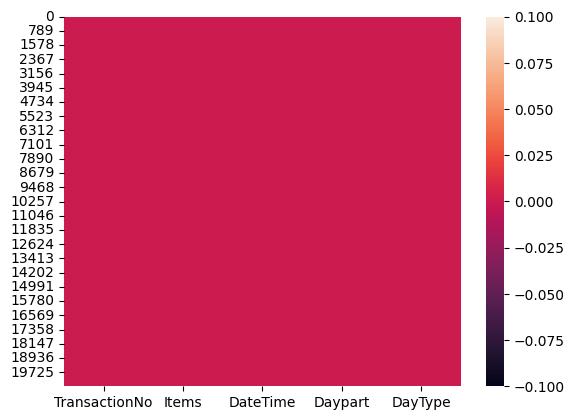

In [13]:
sns.heatmap(df.isnull())
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



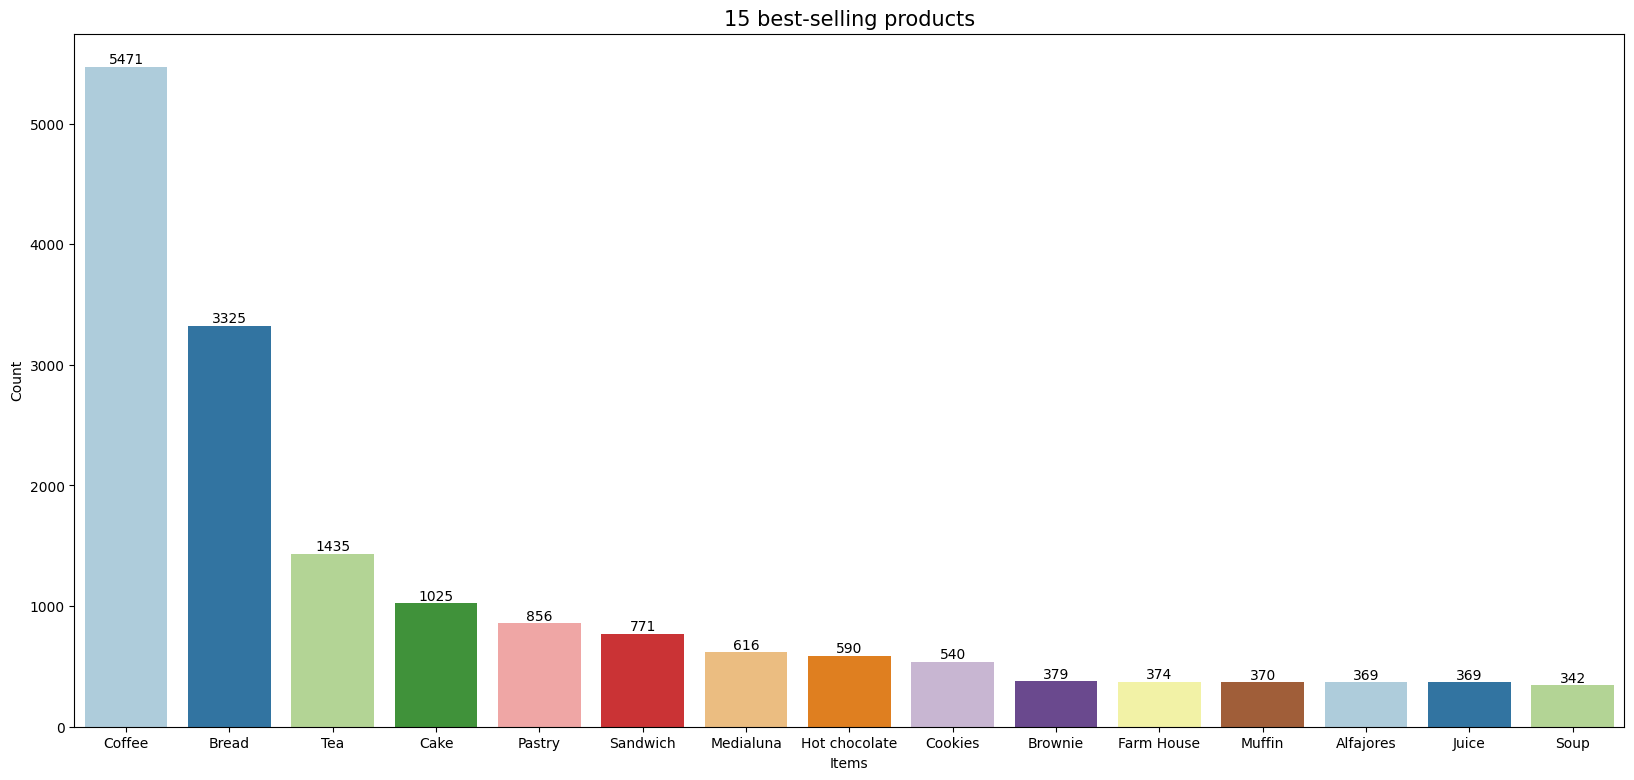

In [15]:
products=df["Items"].value_counts().head(15).reset_index(name="Count")
products=products.rename(columns={"index":"Items"})
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("15 best-selling products",size=15)

In [22]:
datayears=df.groupby("Year")["TransactionNo"].count().reset_index()
datayears

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Year,TransactionNo
0,2016,8144
1,2017,12363


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



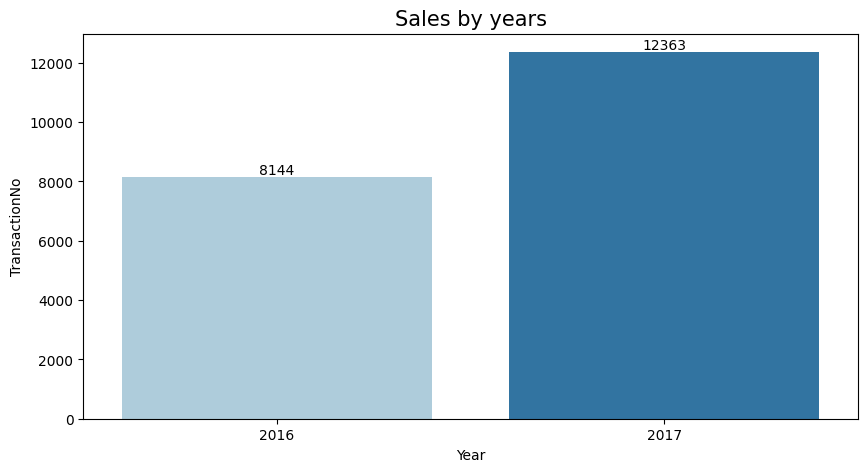

In [23]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="Year",y="TransactionNo",data=datayears,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by years",size=15)

In [24]:
datamonth=df.groupby("Month")["TransactionNo"].count().reset_index()
datamonth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Month,TransactionNo
0,April,1048
1,August,700
2,December,2647
3,February,2748
4,January,3027
5,July,741
6,June,739
7,March,3220
8,May,924
9,November,3076


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



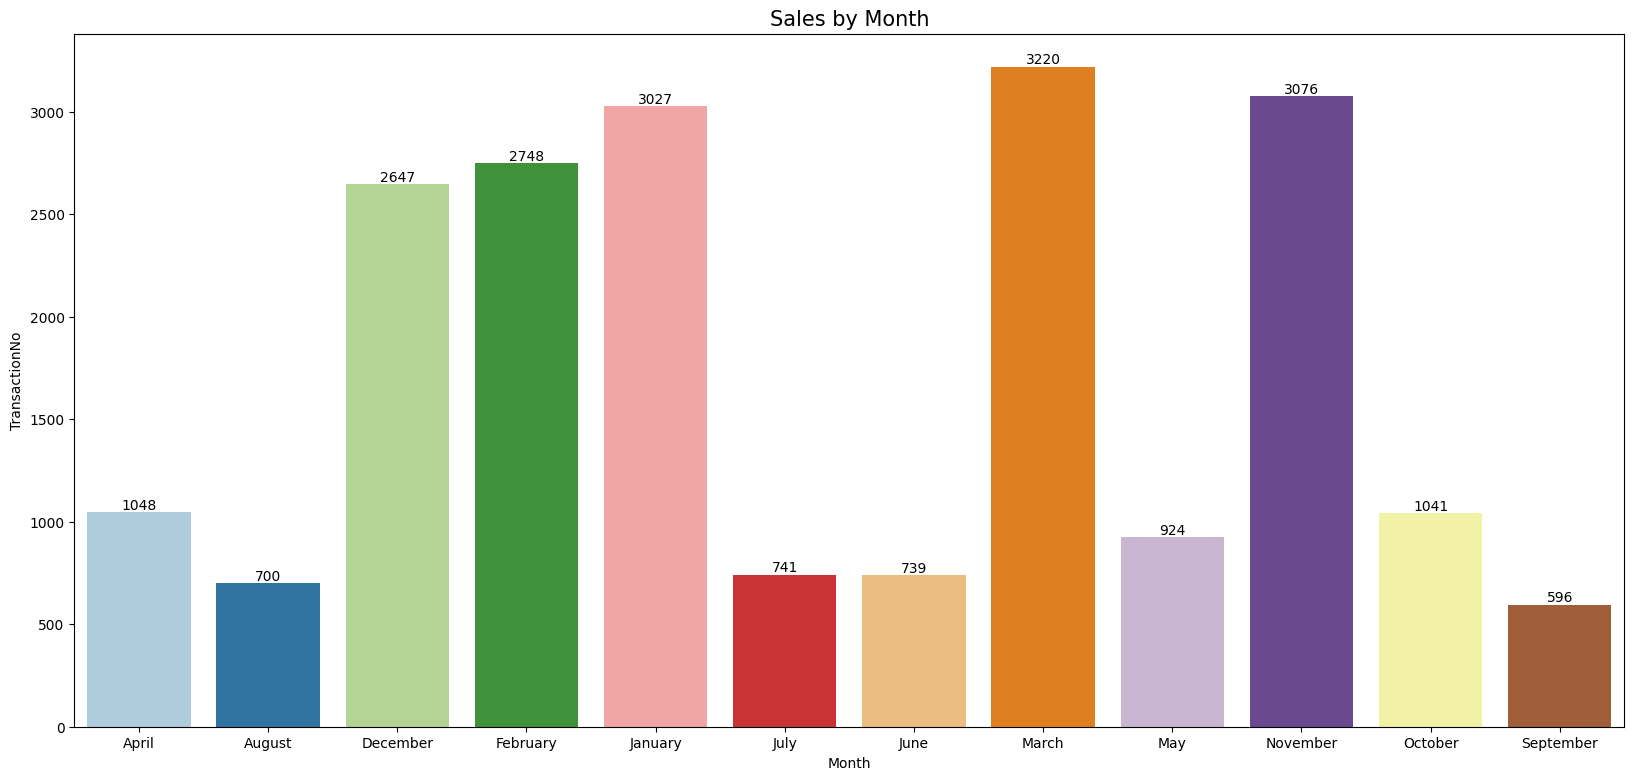

In [25]:
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Month",y="TransactionNo",data=datamonth,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by Month",size=15)

In [26]:
dataweek=df.groupby("Week Day")["TransactionNo"].count().reset_index()
dataweek

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Week Day,TransactionNo
0,Friday,3266
1,Monday,3035
2,Saturday,3554
3,Sunday,3118
4,Thursday,2601
5,Tuesday,2645
6,Wednesday,2288


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



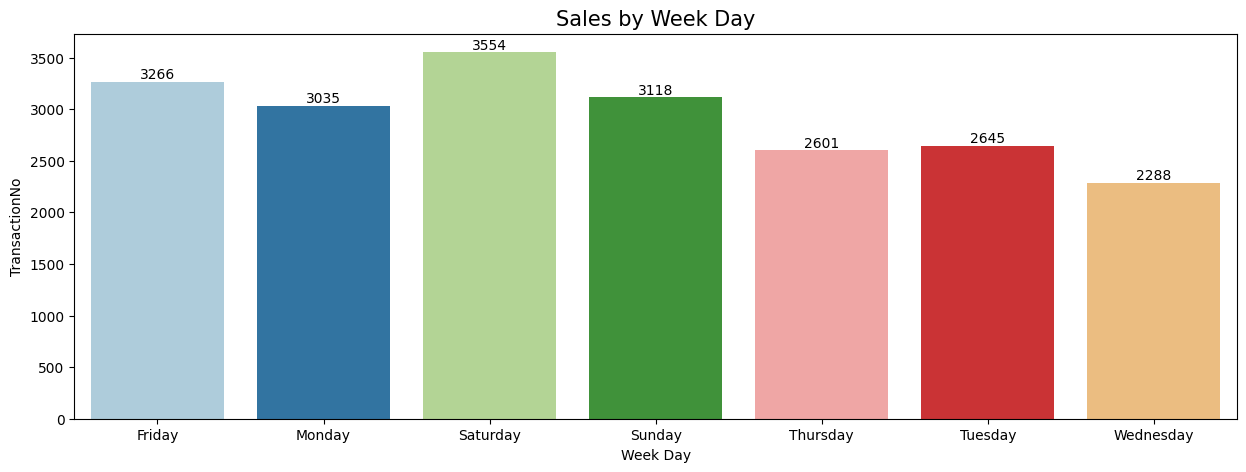

In [27]:
plt.figure(figsize=(15,5))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Week Day",y="TransactionNo",data=dataweek,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by Week Day",size=15)

# Modelling

In [28]:
dataapriori=df.groupby(["TransactionNo","Items"])["Items"].count().reset_index(name="Quantity")
dataapriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,TransactionNo,Items,Quantity
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [29]:
datapivot=dataapriori.pivot_table(index="TransactionNo",columns="Items",values="Quantity",aggfunc="sum").fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
datapivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def table(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

datapivottable=datapivot.applymap(table)
datapivottable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
aprioridata=apriori(datapivottable,min_support=0.01,use_colnames=True)
aprioridata

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Bread, Cake, Coffee)"
59,0.011199,"(Bread, Pastry, Coffee)"


In [33]:
rules=association_rules(aprioridata, metric = "lift", min_threshold = 1)
rules.sort_values("confidence",ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


# Visualisasi Hasil Algoritma

In [34]:
network_A = list(rules["antecedents"].unique())
network_B = list(rules["consequents"].unique())
node_list = list(set(network_A + network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules.iterrows():
    G.add_edges_from([(j["antecedents"], j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text',
    marker=dict(showscale=True, colorscale='Burg', reversescale=True, color=[], size=15,
    colorbar=dict(thickness=10, title='Node Connections', xanchor='left', titleside='right')))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +'<br>No of Connections: {}'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(title='Item Connections Network', titlefont=dict(size=20),
    plot_bgcolor='white', showlegend=False, margin=dict(b=0,l=0,r=0,t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Save Model (Pickle)

Pada streamlit association rule saya menggunakan CSV dari kaggle jadi tidak melakukan import pickle .sav